# Multiclass Classifier with Perceptron(OneVsAll)

* MNIST handwritten digiot classification with perceptron
* Approach: Since perrceptron can only handle binary classification natively, we combine multiple binary classifiers


In [3]:
# Common Imports
import numpy as np
import pandas as pd
import os
import io
import warnings

#skearn importts
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import hinge_loss
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV
from pprint import pprint

# make pretty images
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Data Loading
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [5]:
#To numpy arrays
X = X.to_numpy()
y = y.to_numpy()

#scaling
X = MinMaxScaler().fit_transform(X)

#Train-Test_Split
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [7]:
#Let's use LabelBinarizer just to see how the encoding works
y_train_ovr = LabelBinarizer().fit_transform(y_train)

for i in range(10):
    print('{0}:{1}'.format(y_train[i], y_train_ovr[i]))

5:[0 0 0 0 0 1 0 0 0 0]
0:[1 0 0 0 0 0 0 0 0 0]
4:[0 0 0 0 1 0 0 0 0 0]
1:[0 1 0 0 0 0 0 0 0 0]
9:[0 0 0 0 0 0 0 0 0 1]
2:[0 0 1 0 0 0 0 0 0 0]
1:[0 1 0 0 0 0 0 0 0 0]
3:[0 0 0 1 0 0 0 0 0 0]
1:[0 1 0 0 0 0 0 0 0 0]
4:[0 0 0 0 1 0 0 0 0 0]


In [8]:
y_train_ovr.shape

(60000, 10)

In [9]:
clf = Perceptron(random_state=1729)
clf.fit(x_train, y_train)

Perceptron(random_state=1729)

In [10]:
print('Shape of Weight matrix:{0} and bias vector:{1}'.format(clf.coef_.shape, clf.intercept_.shape))

Shape of Weight matrix:(10, 784) and bias vector:(10,)


In [15]:
scores = clf.decision_function(x_train[6].reshape(1,-1))
print(scores)
print('Predicted Class: ', np.argmax(scores), 'Actual Class: ', y_train[6])

[[-631.88492118  154.366213    -65.23234141  -90.95338716 -189.29568627
  -137.14385236  -99.64604383 -159.09859285 -136.86391388 -199.26120723]]
Predicted Class:  1 Actual Class:  1


In [17]:
y_hat = clf.predict(x_train)
print(classification_report(y_train, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5923
           1       0.94      0.98      0.96      6742
           2       0.89      0.90      0.90      5958
           3       0.86      0.87      0.87      6131
           4       0.89      0.94      0.91      5842
           5       0.81      0.88      0.85      5421
           6       0.92      0.97      0.94      5918
           7       0.91      0.94      0.92      6265
           8       0.92      0.77      0.84      5851
           9       0.92      0.82      0.87      5949

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.91      0.90      0.90     60000



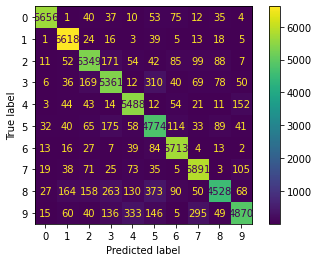

In [18]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_hat, values_format='.5g')